## 1- Install libraries

First, install and import `fastai` and `wandb`.

In [1]:
!pip install -qqq wandb
!pip install -qqqU fastai

     |████████████████████████████████| 1.7 MB 4.2 MB/s 
     |████████████████████████████████| 140 kB 26.9 MB/s 
     |████████████████████████████████| 97 kB 3.7 MB/s 
     |████████████████████████████████| 180 kB 31.3 MB/s 
     |████████████████████████████████| 63 kB 1.1 MB/s 
     |████████████████████████████████| 189 kB 5.3 MB/s 
     |████████████████████████████████| 56 kB 3.9 MB/s 


In [2]:
from fastai.vision.all import *
import wandb
from fastai.callback.wandb import *

## 2- Log in to W&B
Log in so your results can stream to a private project in W&B. Here's more info on the [data privacy and export features](https://docs.wandb.com/company/data-and-privacy) you can use so W&B can serve as a reliable system of record for your experiments.

*Note: Login only needs to be done once, and it is automatically called with `wandb.init()`.*

In [3]:
wandb.login()

<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

## 3- Download the dataset

Fastai datasets are downloaded from a URL and cached locally.

In [4]:
path = untar_data(URLs.MNIST_TINY)
path

Path('/root/.fastai/data/mnist_tiny')

This specific dataset contains:
* a folder of input images
* a folder of segmentation masks (same name as images with added suffix `_P`)
* a file listing in order the possible classes
* a file listing which files belong to validation set

## 4- Create DataLoaders
We can create `DataLoaders` in many possible ways: from a `Dataset`, `TfmdList`, `DataBlock` or custom methods such as `ImageDataLoaders` or `SegmentationDataLoaders`.

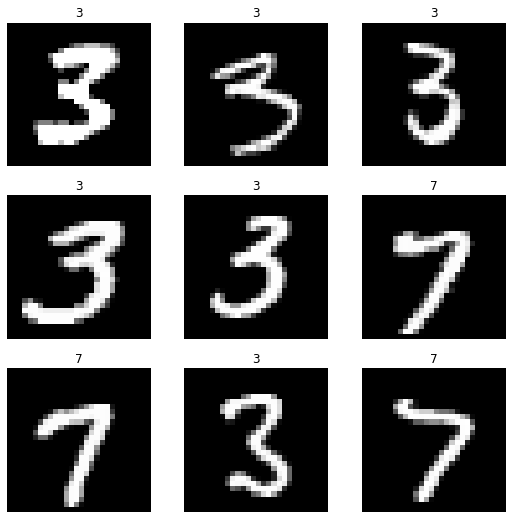

In [5]:
dls = ImageDataLoaders.from_csv(path,bs=128)
dls.show_batch()

## 5- Train a model

We start a new W&B run with wandb.init() which gives us a link to our logged run.

In [6]:
wandb.init(project='fastai');

wandb: Currently logged in as: saisameer999 (use `wandb login --relogin` to force relogin)


`WandbCallback` can automatically track:
* hyper-parameters
* losses & metrics
* models
* datasets
* code
* computer resources

In addition to logging losses & metrics, we are going to log our dataset and our model, which will be automatically versioned.

In [7]:
learn = cnn_learner(dls, resnet34, cbs=[WandbCallback(log_dataset=True, log_model=True), SaveModelCallback()])

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

In [8]:
learn.fit_one_cycle(100)

wandb: Adding directory to artifact (/root/.fastai/data/mnist_tiny/test)... Done. 0.2s
wandb: Adding directory to artifact (/root/.fastai/data/mnist_tiny/train)... Done. 1.1s
wandb: Adding directory to artifact (/root/.fastai/data/mnist_tiny/valid)... Done. 1.1s


epoch,train_loss,valid_loss,time
0,1.077764,0.456521,00:04
1,1.021926,0.633502,00:04
2,0.922923,0.535258,00:04
3,0.860311,0.385968,00:03
4,0.780567,0.281402,00:03
5,0.690165,0.226266,00:03
6,0.617520,0.193663,00:03
7,0.547249,0.183139,00:04
8,0.487584,0.161728,00:04
9,0.429942,0.148327,00:04


Better model found at epoch 0 with valid_loss value: 0.4565214514732361.
Better model found at epoch 3 with valid_loss value: 0.38596826791763306.
Better model found at epoch 4 with valid_loss value: 0.28140193223953247.
Better model found at epoch 5 with valid_loss value: 0.22626644372940063.
Better model found at epoch 6 with valid_loss value: 0.1936628371477127.
Better model found at epoch 7 with valid_loss value: 0.18313898146152496.
Better model found at epoch 8 with valid_loss value: 0.16172829270362854.
Better model found at epoch 9 with valid_loss value: 0.1483270227909088.
Better model found at epoch 10 with valid_loss value: 0.1360599547624588.
Better model found at epoch 11 with valid_loss value: 0.12247145175933838.
Better model found at epoch 12 with valid_loss value: 0.11569755524396896.
Better model found at epoch 13 with valid_loss value: 0.10141753405332565.
Better model found at epoch 14 with valid_loss value: 0.08448395878076553.
Better model found at epoch 15 with v

In [9]:
# optional: mark the run as completed
wandb.finish()

epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
eps_0,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
eps_1,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
eps_2,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
lr_0,▁▁▂▃▄▅▆▇███████▇▇▇▇▆▆▆▅▅▅▄▄▄▃▃▃▂▂▂▂▁▁▁▁▁
lr_1,▁▁▂▃▄▅▆▇███████▇▇▇▇▆▆▆▅▅▅▄▄▄▃▃▃▂▂▂▂▁▁▁▁▁
lr_2,▁▁▂▃▄▅▆▇███████▇▇▇▇▆▆▆▅▅▅▄▄▄▃▃▃▂▂▂▂▁▁▁▁▁
mom_0,██▇▆▅▄▃▂▁▁▁▁▁▁▁▂▂▂▂▃▃▃▄▄▄▅▅▅▆▆▆▇▇▇▇█████
mom_1,██▇▆▅▄▃▂▁▁▁▁▁▁▁▂▂▂▂▃▃▃▄▄▄▅▅▅▆▆▆▇▇▇▇█████
mom_2,██▇▆▅▄▃▂▁▁▁▁▁▁▁▂▂▂▂▃▃▃▄▄▄▅▅▅▆▆▆▇▇▇▇█████
raw_loss,█▆▄▃▃▁▂▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁


That's it! Check out your fastai model training in the live W&B dashboard by clicking on the link printed out above.

# Example W&B dashboard
![](https://i.imgur.com/jef6GjA.png)
